In [1]:
from data import *
import matplotlib.pyplot as plt
%matplotlib inline
from loss import *

from torch import nn
from torch.autograd import Variable
from train import *


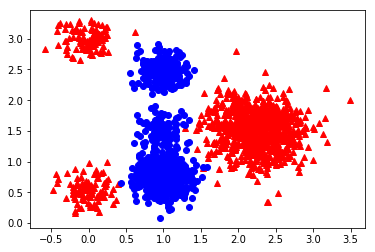

In [2]:
# create training data 
p = pos()
n = neg()
XY,x,y = getXY(p,n)
plot(p,n)

In [4]:
# enumerate the space of lines and get prec, recall, f (min func) and g(cond func)

f = nn.Sequential(nn.Linear(2,1))#, nn.Tanh())
PP,RR,F,G,Pp,Rr = [],[],[],[],[],[]
a = 0.45
for x1 in torch.linspace(-4,4,200):
    for x2 in torch.linspace(-4,4,200):
        f[0].weight.data[0][0] = 1
        f[0].weight.data[0][1] = (x1-x2)/4.0 
        f[0].bias.data[0] = -x1
        PP.append(Pl(f(x),y).data[0])
        RR.append(Rl(f(x),y).data[0])
        Pp.append(P(f(x),y).data[0])
        Rr.append(R(f(x),y).data[0])
        F.append(RatPf(f(x),y).data[0])
        G.append(RatPg(f(x),y,a).data[0])
        #break
GG = np.array(G)
FF = np.array(F)
PP = np.array(PP)
RR = np.array(RR)

Pp = np.array(Pp)
Rr = np.array(Rr)

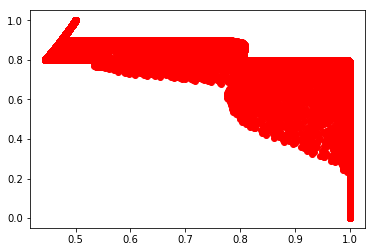

In [5]:
# plot of true Prec vs Recall
plt.plot(torch.Tensor(Pp).clamp(0,1).numpy(),torch.Tensor(Rr).clamp(0,1).numpy(),'ro')

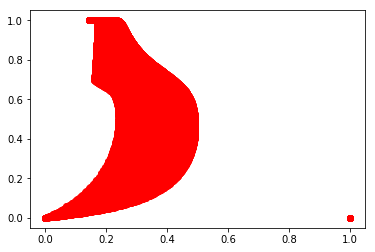

In [6]:
# plot of lower bounds of Prec vs Recall
plt.plot(torch.Tensor(PP).clamp(0,1).numpy(),torch.Tensor(RR).clamp(0,1).numpy(),'ro')

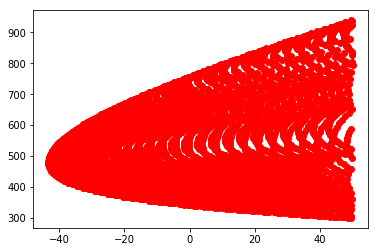

In [7]:
# plot of min vs cond
plt.plot(GG[GG<50],FF[GG<50],'ro')

In [9]:
# the target minimum satisfying the cond <0
FF[GG<0].min()

342.40673828125

1.0016647577285767 320.16192626953125 916.408447265625
0.6457486748695374
1.1336486339569092 272.3760986328125 341.93316650390625
0.3254687786102295
1.2672199010849 260.18017578125 296.88201904296875
0.31342580914497375
1.3941835165023804 247.6806640625 253.326904296875
0.2994652986526489
1.5153357982635498 238.28564453125 209.626220703125
0.285476952791214
1.6325762271881104 232.14617919921875 169.39341735839844
0.2742767035961151
1.7483292818069458 231.5601806640625 133.67486572265625
0.26927611231803894
1.8640413284301758 230.335205078125 117.38985443115234
0.27326467633247375
1.9781230688095093 225.93310546875 121.3836441040039
0.28404954075813293
2.0897812843322754 220.09613037109375 128.00648498535156
0.29388830065727234
2.1981749534606934 213.53033447265625 135.6317596435547
0.3024255335330963
2.3033792972564697 207.14935302734375 142.33432006835938
0.30967310070991516
2.405264377593994 200.2430419921875 149.6188201904297
0.3155761659145355
2.503505229949951 192.69464111328125 1

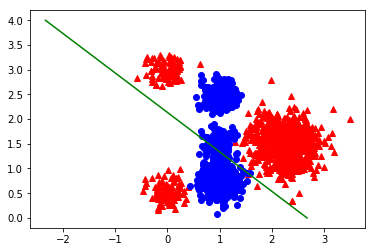

In [10]:
num_epochs = 600
learning_rate = 0.1
f = nn.Sequential(nn.Linear(2,1))#, nn.Tanh())
criterion = RatPLoss(a, 1)
trainl(f, criterion, x, y, a=a, lr=0.01)
trainl(f, criterion, x, y, a=a, lr=0.01)

plotf(p,n,f[0])

In [17]:
P(f(x),y).data[0], Pl(f(x),y).data[0], R(f(x),y).data[0], Rl(f(x),y).data[0], 

(0.7603725790977478,
 0.45011308789253235,
 0.8980000019073486,
 0.6612406969070435)